*Modelo de Clasificación con Regresión Logística para valores categóricos*    
Ailén de Barbará y Tomás Schiavonne - 4 TIC A


*IMPORTAR TODO LO NECESARIO*

In [ ]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import BaggingClassifier

od.download("https://www.kaggle.com/c/titanic/data")
data = pd.read_csv('titanic/train.csv')
print(data.head())

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ailndebarbar
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 33.0MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


*MOSTRARLO EN FORMATO TABLA*

In [ ]:
print(tabulate(data.head(), headers='keys', tablefmt='psql'))

+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
|----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     | C          |
|  2 |             3 |          1 |        3 | Hei

*INDICAR LOS VALORES NUMERICOS Y LOS VALORES CATEGORICOS*

In [ ]:
titanic = sns.load_dataset('titanic')

# Identificar las columnas categóricas
categorical_columns = titanic.select_dtypes(include=['object']).columns

# Transformar todas las columnas a numéricas
le = LabelEncoder()
for col in categorical_columns:
    titanic[col] = le.fit_transform(titanic[col].astype(str))

print(titanic.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2  Third    1   
1         1       1    0  38.0      1      0  71.2833         0  First    2   
2         1       3    0  26.0      0      0   7.9250         2  Third    2   
3         1       1    0  35.0      1      0  53.1000         2  First    2   
4         0       3    1  35.0      0      0   8.0500         2  Third    1   

   adult_male deck  embark_town  alive  alone  
0        True  NaN            2      0  False  
1       False    C            0      1  False  
2       False  NaN            2      1   True  
3       False    C            2      1  False  
4        True  NaN            2      0   True  


*EXPLORACION DE DATOS (EDA)*

In [ ]:
print(data.info())
print(data.describe())
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
# Valores nulos
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


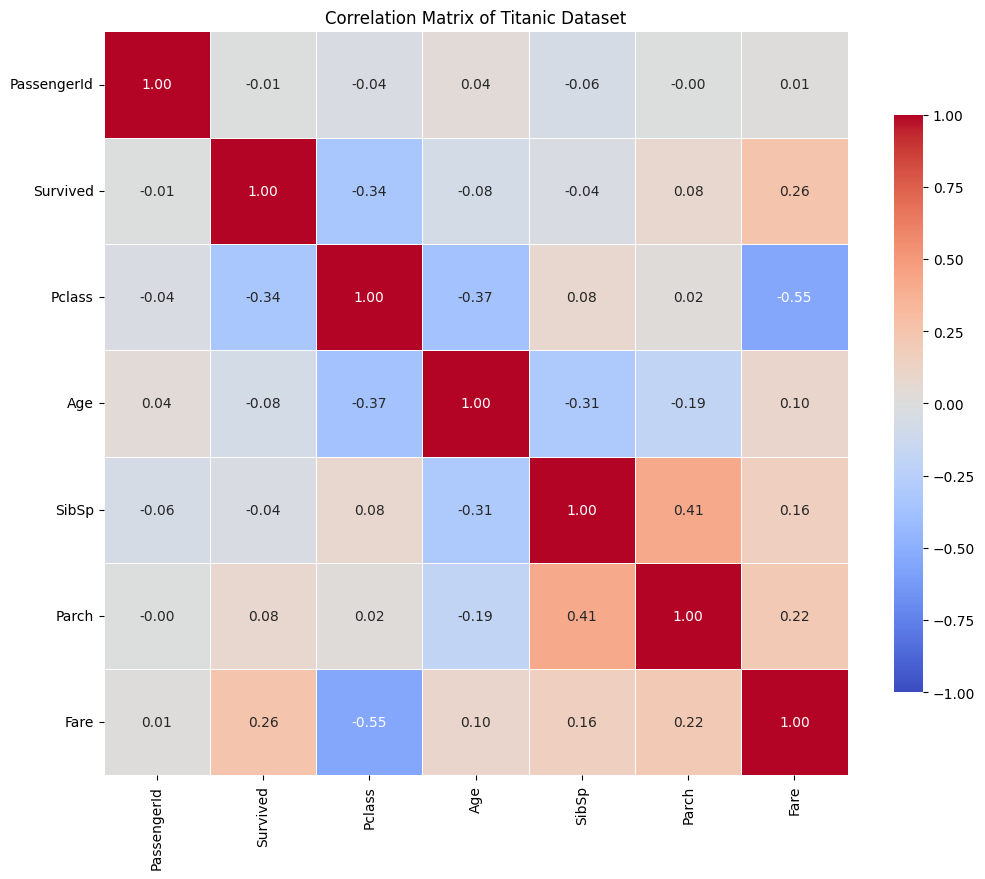

In [ ]:
categorical_columns = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
cm = categorical_columns.corr()

# Plotear la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,
            cbar_kws={'shrink': .75}, square=True, linewidths=0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

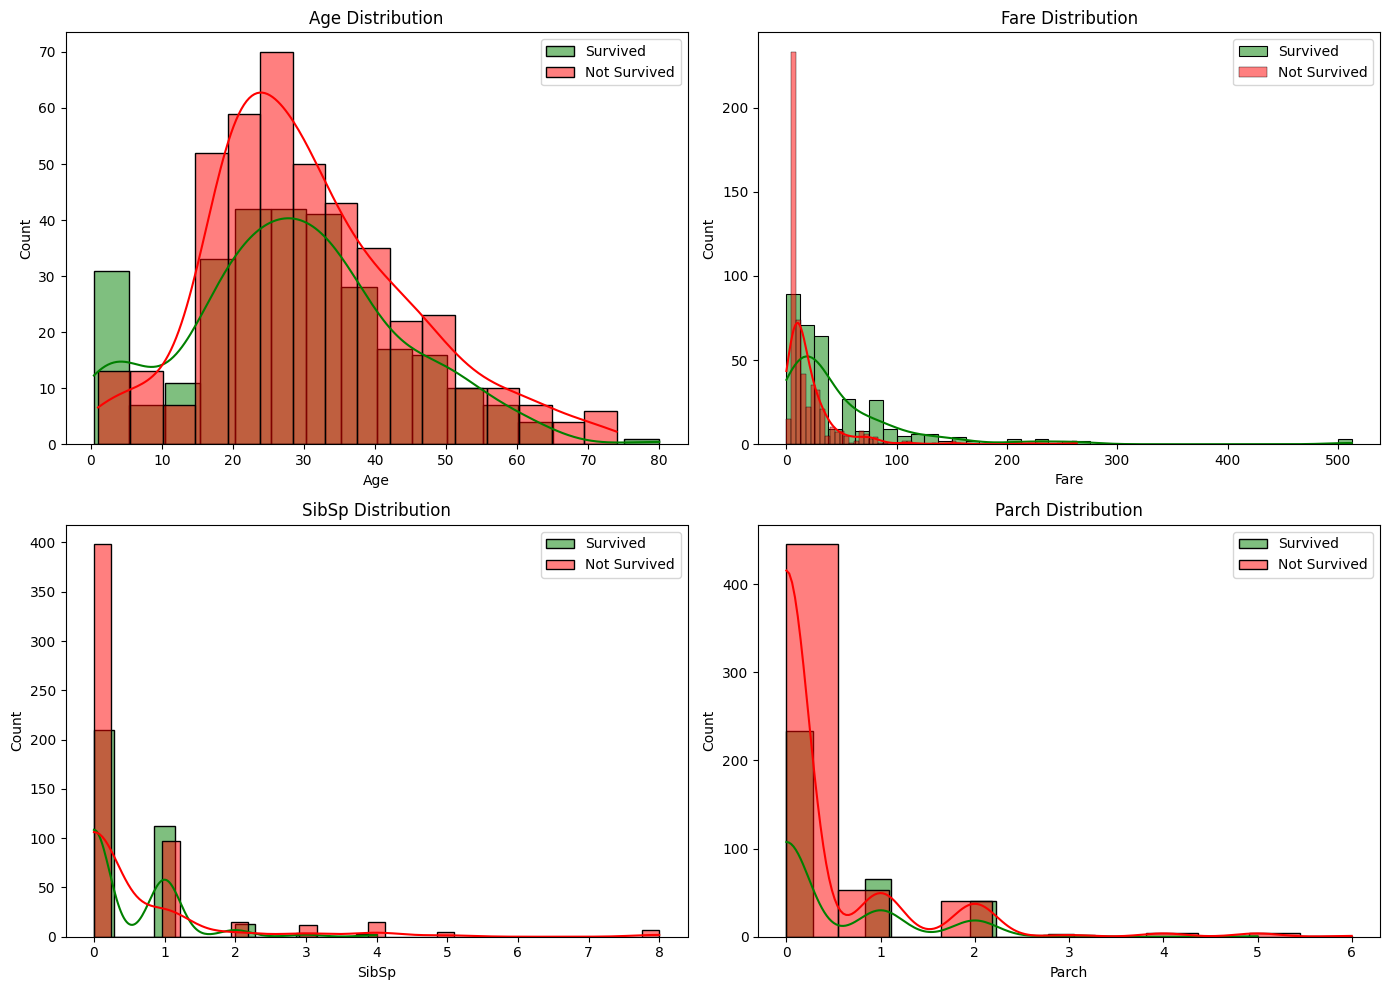

In [ ]:
ds_survived = data[data["Survived"] == 1]
ds_not_survived = data[data["Survived"] == 0]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Graficar la distribución de 'Age'
sns.histplot(ds_survived["Age"].dropna(), kde=True, color="green", ax=axs[0, 0], label="Survived")
sns.histplot(ds_not_survived["Age"].dropna(), kde=True, color="red", ax=axs[0, 0], label="Not Survived")
axs[0, 0].set_title("Age Distribution")
axs[0, 0].legend()

# Graficar la distribución de 'Fare'
sns.histplot(ds_survived["Fare"].dropna(), kde=True, color="green", ax=axs[0, 1], label="Survived")
sns.histplot(ds_not_survived["Fare"].dropna(), kde=True, color="red", ax=axs[0, 1], label="Not Survived")
axs[0, 1].set_title("Fare Distribution")
axs[0, 1].legend()

# Graficar la distribución de 'SibSp' (Número de hermanos/cónyuges a bordo)
sns.histplot(ds_survived["SibSp"], kde=True, color="green", ax=axs[1, 0], label="Survived")
sns.histplot(ds_not_survived["SibSp"], kde=True, color="red", ax=axs[1, 0], label="Not Survived")
axs[1, 0].set_title("SibSp Distribution")
axs[1, 0].legend()

# Graficar la distribución de 'Parch' (Número de padres/hijos a bordo)
sns.histplot(ds_survived["Parch"], kde=True, color="green", ax=axs[1, 1], label="Survived")
sns.histplot(ds_not_survived["Parch"], kde=True, color="red", ax=axs[1, 1], label="Not Survived")
axs[1, 1].set_title("Parch Distribution")
axs[1, 1].legend()

fig.tight_layout()
plt.show()

#TODO ESTO FUE SACADO DE TU CODIGO EN GITHUB

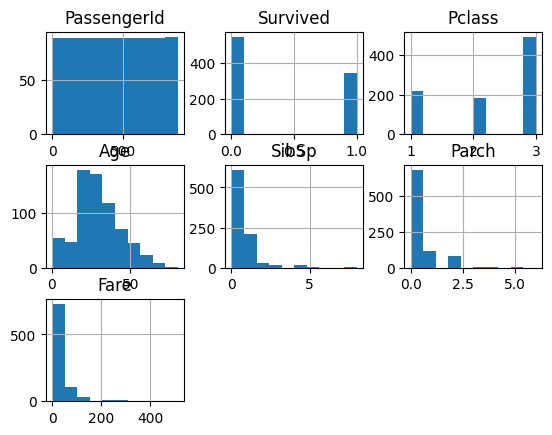

In [26]:
# También sacado de tu código
data.hist()
plt.show()

*MODELO DE CLASIFICACIÓN CON REGRESIÓN LOGÍSTICA*

In [ ]:
titanic_numeric = titanic.select_dtypes(include=['float64', 'int64'])
titanic_numeric['sex'] = titanic['sex']
titanic_numeric = titanic_numeric.dropna()

# Elegimos Sex como la variable a predecir
X = titanic_numeric.drop(columns=['sex'])
y = titanic_numeric['sex']
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (571, 10)
X_test shape: (143, 10)
y_train shape: (571,)
y_test shape: (143,)


In [ ]:
#Crear el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

Evaluar el módelo (Métricas):
- Accuracy
- Confussion Matrix

In [ ]:
#Verifica la Accuracy
Accuracy1 = f'Accuracy: {accuracy:.4f}'
print(Accuracy1)

Accuracy: 0.8951


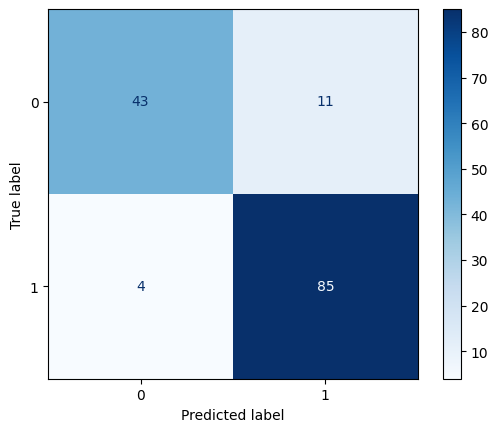

In [ ]:
#Muestra la Confusion Matrix en un gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

*COEFICIENTES DEL MODELO (CON ESCALADO)*

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
coefficients = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

# Creamos un DataFrame para mostrar los coeficientes
coef_df = pd.DataFrame({'Titulo': feature_names, 'Coeficiente': coefficients})
coef_df['Coeficiente_Absoluto'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Coeficiente_Absoluto', ascending=False)

print(coef_df.head(10))

        Titulo  Coeficiente  Coeficiente_Absoluto
7        sibsp    -3.647969              3.647969
0          age    -1.320899              1.320899
9          who    -1.320899              1.320899
4         fare    -0.892883              0.892883
3     embarked    -0.441663              0.441663
1        alive    -0.126414              0.126414
2  embark_town     0.094219              0.094219
6       pclass     0.062155              0.062155
8     survived     0.062155              0.062155
5        parch     0.001038              0.001038


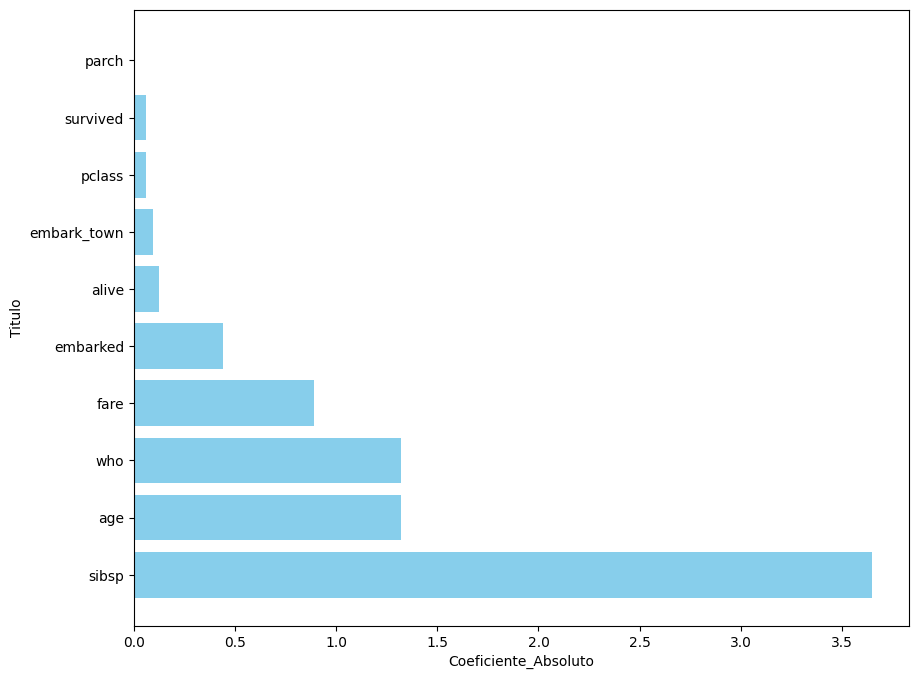

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(coef_df['Titulo'], coef_df['Coeficiente_Absoluto'], color='skyblue')
ax.set_xlabel('Coeficiente_Absoluto')
ax.set_ylabel('Titulo')
plt.show()

*EVALUACIÓN DE PERFORMANCE CON ROC AUC*

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.9271743653766125


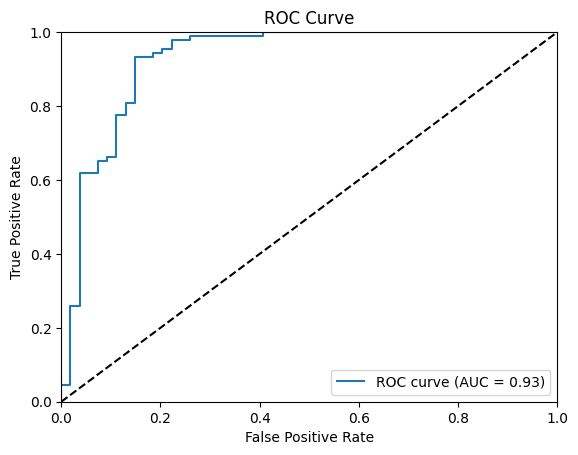

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

*MOSTRAR "FEATURE IMPORTANCE"*

In [ ]:
# Obtenemos los coeficientes
coefficients = model.coef_[0]
num_features = coefficients.shape[0]

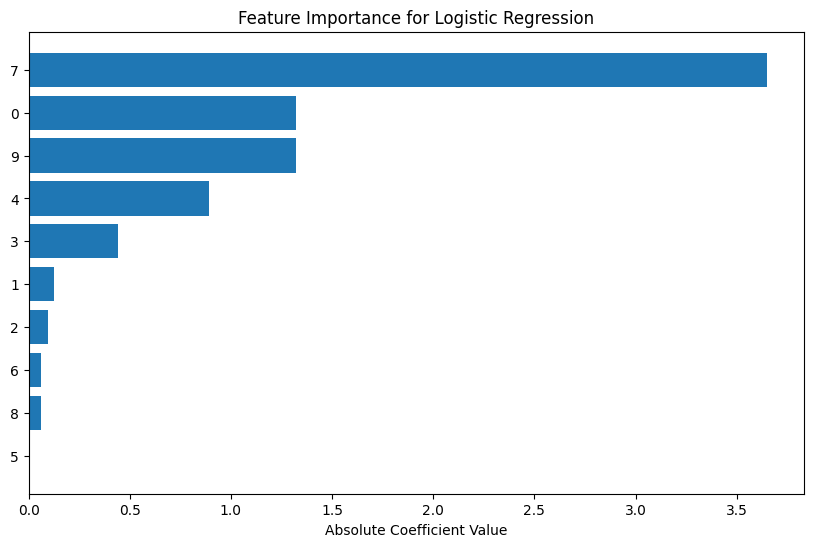

In [ ]:
# Indice para las características
feature_indices = np.arange(num_features)
sorted_idx = np.argsort(np.abs(coefficients))

plt.figure(figsize=(10, 6))
plt.barh(range(num_features), np.abs(coefficients[sorted_idx]), align='center')
plt.yticks(range(num_features), feature_indices[sorted_idx])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance for Logistic Regression')
plt.show()

*BONUS* --> *BAGGING*

In [ ]:
logistic_regression = LogisticRegression(max_iter=1000)

bagging_clf = BaggingClassifier(
    estimator=logistic_regression,
    n_estimators=50,
    random_state=42
)

In [ ]:
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión con Bagging: {accuracy:.2f}')

Precisión con Bagging: 0.90
